<h3>Exploring Data</h3>

In [163]:
import pandas as pd
import numpy as np
import os

In [164]:
train_df = pd.read_csv('data/train(2).csv', index_col='PassengerId')
test_df = pd.read_csv('data/test(2).csv', index_col='PassengerId')

In [165]:
test_df['Survived']= -999

In [166]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

(None, None)

In [167]:
df = pd.concat((train_df, test_df),axis=0)

In [168]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
df.shape

(1309, 11)

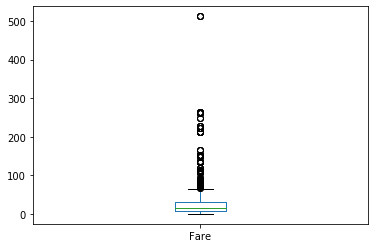

In [170]:
#box plot
df.Fare.plot(kind='box')

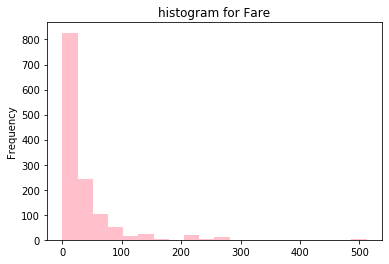

In [171]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='pink', bins=20);

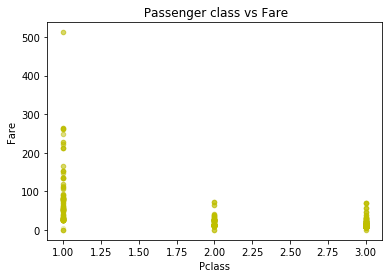

In [172]:
df.plot.scatter(x='Pclass', y='Fare', color='y', title=' Passenger class vs Fare', alpha=0.2);

<h3>Cleaning Data</h3>

In [173]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [174]:
df.Embarked.fillna('C', inplace=True)

In [175]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

In [176]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-318.747135,2.294882,29.881138,0.498854,0.385027,33.295479
std,466.107167,0.837836,14.413493,1.041658,0.865560,51.758668
min,-999.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-999.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


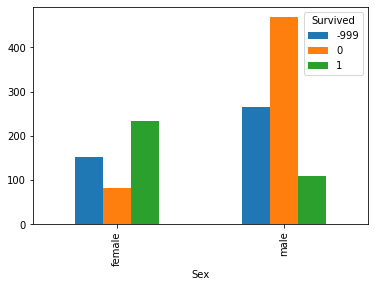

In [177]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar');

In [178]:
#females are more likely to survive

In [179]:
#We can get a lot of information from the title of the person
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title


In [180]:
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]


In [181]:
df.Name.map(lambda x : GetTitle(x))

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Lady
1307        Mr
1308        Mr
1309    Master
Name: Name, Length: 1309, dtype: object

In [182]:
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [183]:
#As there are a lot of missing values in age we need to fill them
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [184]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
Title          0
dtype: int64

In [185]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

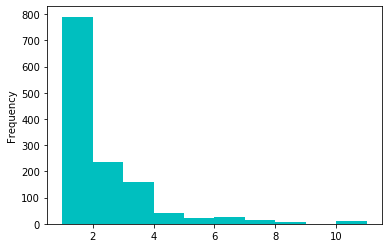

In [186]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [187]:
#We can see that people who are alone have less chances of surviving

In [188]:
# family size 
family_survived = pd.crosstab(df[df.Survived != -999].FamilySize, df[df.Survived != -999].Survived)
print(family_survived)

Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


In [189]:
# impact of family size on survival rate
family_survived =  df[df.Survived != -999].groupby(['FamilySize','Survived']).size().unstack()
print(family_survived)

Survived        0      1
FamilySize              
1           374.0  163.0
2            72.0   89.0
3            43.0   59.0
4             8.0   21.0
5            12.0    3.0
6            19.0    3.0
7             8.0    4.0
8             6.0    NaN
11            7.0    NaN


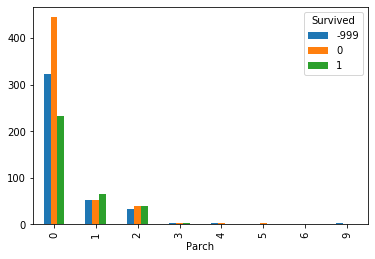

In [190]:
pd.crosstab(df.Parch, df.Survived).plot(kind='bar');

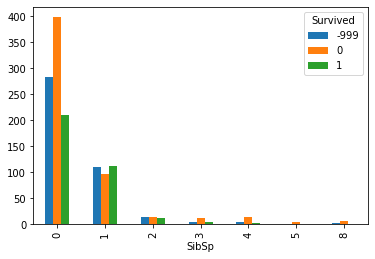

In [191]:
pd.crosstab(df.SibSp, df.Survived).plot(kind='bar');

In [192]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [193]:
pd.crosstab(df[df.Survived != -999].Survived, df[df.Survived != -999].Deck)

Deck,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [194]:
#dropping unnecessary columns

In [195]:
df.drop(['Name', 'Cabin', 'Ticket', 'SibSp' ], axis= 1, inplace= True)

In [196]:
df2 = pd.get_dummies(df, drop_first= True)

In [197]:
df2

,Survived,Pclass,Age,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Master,...,Title_Officer,Title_Sir,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,0,7.2500,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,38.0,0,71.2833,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,7.9250,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,0,53.1000,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,8.0500,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-999,3,29.0,0,8.0500,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,-999,1,39.0,0,108.9000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1307,-999,3,38.5,0,7.2500,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [198]:
df2.isnull().sum()

Survived         0
Pclass           0
Age              0
Parch            0
Fare             1
FamilySize       0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Sir        0
Deck_B           0
Deck_C           0
Deck_D           0
Deck_E           0
Deck_F           0
Deck_G           0
Deck_T           0
Deck_Z           0
dtype: int64

In [199]:
df2.Fare.fillna(df2.Fare.mean(), inplace=True)

In [200]:
train=df2[(df2.index<892)]

In [201]:
test=df2[(df2.index>891)]

In [202]:
y= train['Survived']

In [203]:
test.drop(['Survived'], axis = 1,inplace= True)

/home/somayaji/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [204]:
train.drop(['Survived'], axis = 1,inplace= True)

In [205]:
ID= test.index.to_numpy()

<h3>Train Test Split</h3>

In [ ]:
from sklearn.model_selection import train_test_split# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

In [206]:
from sklearn.ensemble import RandomForestClassifier

X = train.astype('float')
# y = train['Survived'].ravel()



model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train, y)
y_predict = model.predict(test)


In [207]:

output = pd.DataFrame({'PassengerId': ID, 'Survived': y_predict})
output.to_csv('RFC.csv', index=False)